# Phần 1: Khởi tạo và Chuẩn bị dữ liệu

In [2]:
# 1. Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cấu hình hiển thị biểu đồ đẹp hơn
sns.set_theme(style="whitegrid")

# 2. Đọc dữ liệu
df = pd.read_csv('penguins.csv')

# 3. Làm sạch dữ liệu
# Loại bỏ hàng có giá trị NaN (K-means không chạy được nếu có NaN)
df_clean = df.dropna().copy()

# Chọn các cột số liệu đặc trưng để phân cụm
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df_clean[features]

# 4. Chuẩn hóa dữ liệu (Standard Scaling)
# Giải thích: K-means tính khoảng cách. Nếu 'body_mass_g' (hàng ngàn) so với 'culmen_depth' (hàng chục)
# thì cân nặng sẽ áp đảo. Ta cần đưa hết về cùng một hệ quy chiếu.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Xem qua dữ liệu sau khi chuẩn hóa
print("Dữ liệu đã sẵn sàng!")

Dữ liệu đã sẵn sàng!


# Phần 2: Tìm số cụm K tối ưu (Phương pháp Elbow)

Đây là phần trả lời câu hỏi: "Nên chia làm bao nhiêu nhóm?". Chúng ta vẽ biểu đồ đường (Line Plot).

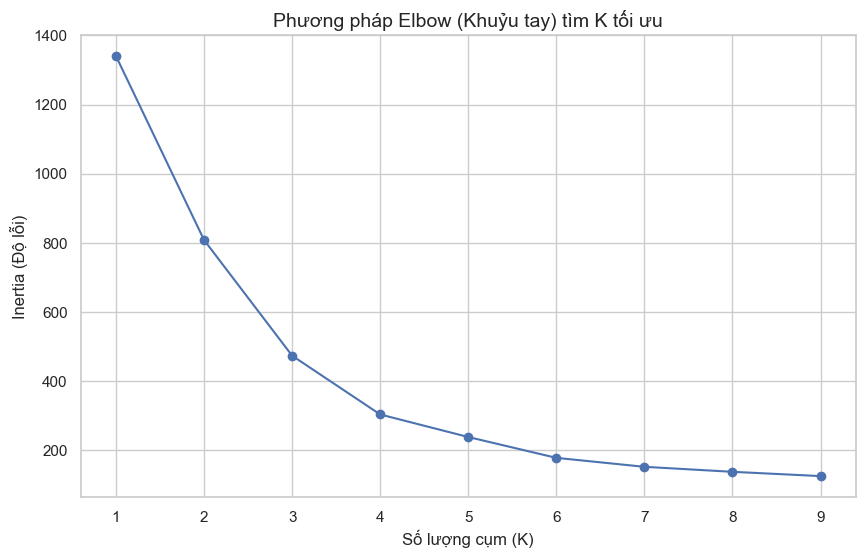

In [3]:
# Danh sách lưu trữ "độ lỗi" (inertia) cho từng K
inertias = []
K_range = range(1, 10) # Thử từ 1 đến 9 cụm

for k in K_range:
    # Tạo mô hình với k cụm
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    # Lưu lại chỉ số inertia (tổng bình phương khoảng cách đến tâm cụm)
    inertias.append(kmeans.inertia_)

# --- VẼ BIỂU ĐỒ ELBOW ---
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linestyle='-', color='b')
plt.title('Phương pháp Elbow (Khuỷu tay) tìm K tối ưu', fontsize=14)
plt.xlabel('Số lượng cụm (K)', fontsize=12)
plt.ylabel('Inertia (Độ lỗi)', fontsize=12)
plt.xticks(K_range)
plt.grid(True)
plt.show()

Giải thích biểu đồ:

Trục tung (Inertia): Độ nén của các cụm. Càng nhỏ càng tốt, nhưng nếu nhỏ quá (bằng 0) thì mỗi điểm là 1 cụm (vô nghĩa).

Trục hoành (K): Số lượng cụm.

Điểm khuỷu tay: Là điểm mà tại đó đồ thị gập mạnh nhất, sau đó độ dốc giảm dần. Tại điểm này, việc tăng thêm cụm không giúp giảm lỗi đáng kể nữa. Với dữ liệu chim cánh cụt, bạn thường thấy điểm gập ở K=3.

# Phần 3: Chạy mô hình và Gán nhãn
Sau khi chọn được K (ví dụ K=3), ta chạy mô hình chính thức.

In [4]:
# Chọn K dựa trên biểu đồ trên
k_optimal = 3 

# Khởi tạo và huấn luyện mô hình
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Gán nhãn cụm (0, 1, 2...) vào dữ liệu gốc để phân tích
df_clean['Cluster'] = kmeans.labels_

# Xem số lượng phần tử trong mỗi cụm
print(df_clean['Cluster'].value_counts())

Cluster
0    213
1    121
2      1
Name: count, dtype: int64


# Phần 4: Trực quan hóa kết quả
Chúng ta sẽ dùng seaborn.scatterplot.

<Figure size 1200x800 with 0 Axes>

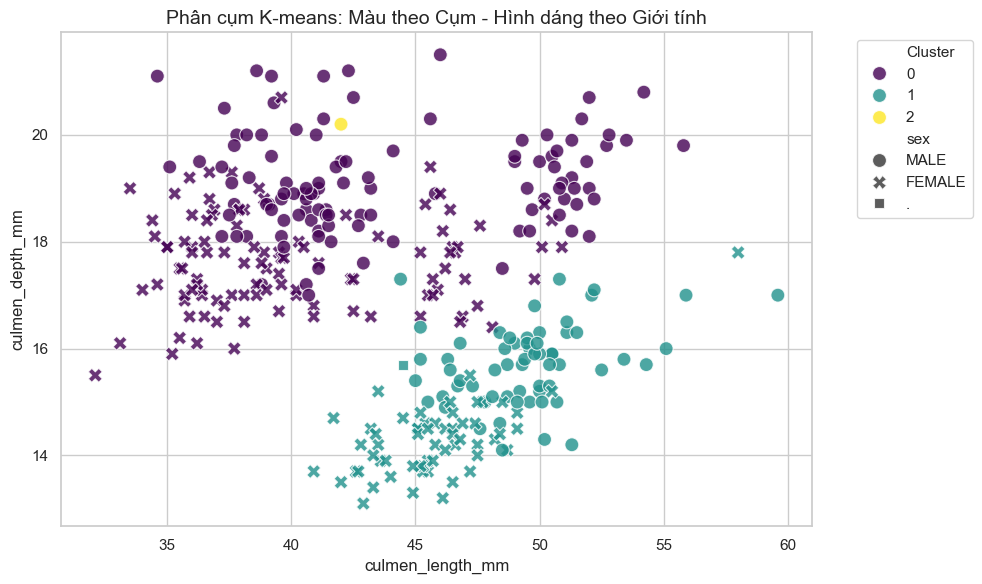

In [ ]:
# --- VẼ BIỂU ĐỒ PHÂN TÁN (SCATTER PLOT) ---

plt.figure(figsize=(12, 8))

# Hàm vẽ chính
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_clean,
    x='culmen_length_mm',  # Trục X
    y='culmen_depth_mm',   # Trục Y
    hue='Cluster',         # MÀU SẮC: Phân biệt Cụm (0, 1, 2)
    style='sex',           # HÌNH DÁNG: Phân biệt Giới tính (MALE, FEMALE)
    palette='viridis',     # Bảng màu
    s=100,                 # Kích thước điểm
    alpha=0.8              # Độ trong suốt
)

plt.title('Phân cụm K-means: Màu theo Cụm - Hình dáng theo Giới tính', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Giải thích biểu đồ:

Mỗi chấm là một chú chim cánh cụt.

Màu sắc (hue): Chỉ định chú chim đó thuộc cụm nào do máy tính tự chia.

Nếu các vùng màu tách biệt nhau rõ rệt trên không gian 2D (ví dụ: nhóm màu vàng nằm riêng, nhóm màu tím nằm riêng), nghĩa là mô hình đã phân loại tốt dựa trên 2 đặc điểm này.

# Phần 5 (Nâng cao): Vẽ biểu đồ cặp (Pairplot)
Để nhìn tổng quan tất cả các đặc trưng cùng lúc (Mỏ, Cánh, Cân nặng)

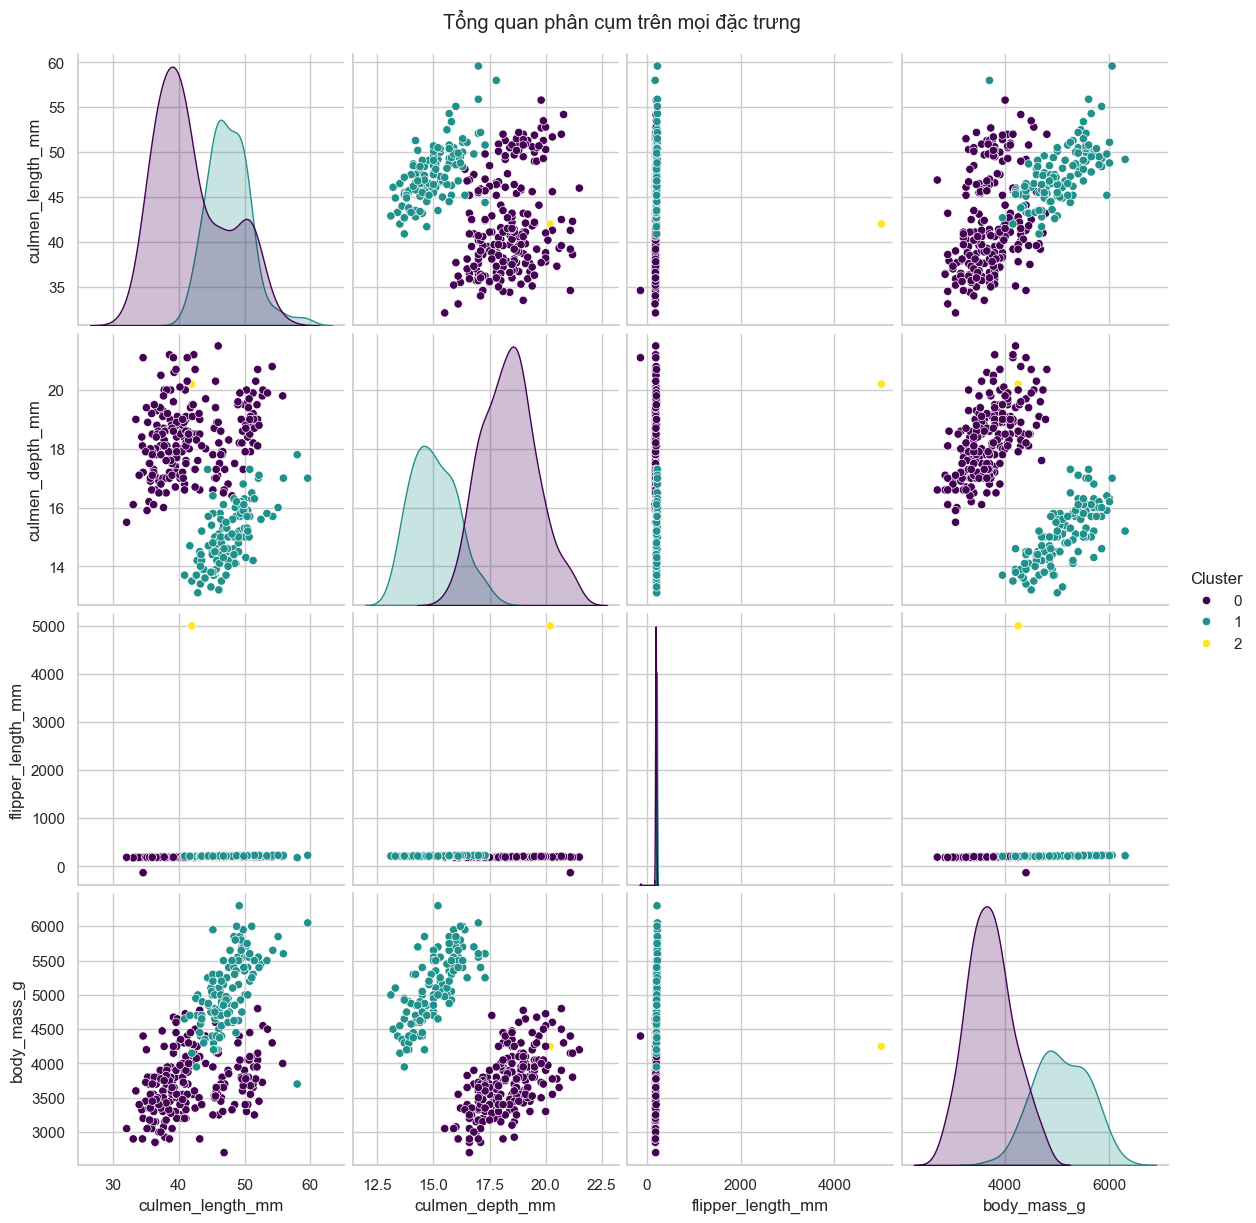

In [6]:
# Vẽ biểu đồ quan hệ giữa tất cả các biến, tô màu theo Cluster
sns.pairplot(
    df_clean, 
    vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], 
    hue='Cluster', 
    palette='viridis',
    height=3
)
plt.suptitle('Tổng quan phân cụm trên mọi đặc trưng', y=1.02)
plt.show()

Giải thích: Biểu đồ này tạo ra một ma trận các biểu đồ. Bạn có thể nhìn thấy cụm nào (màu nào) tách biệt tốt nhất ở cặp đặc tính nào (ví dụ: có thể Cánh và Cân nặng tách cụm tốt hơn Mỏ).